<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/week02/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://heung-bae-lee.github.io/image/Neuron.png' width=800 height=400>

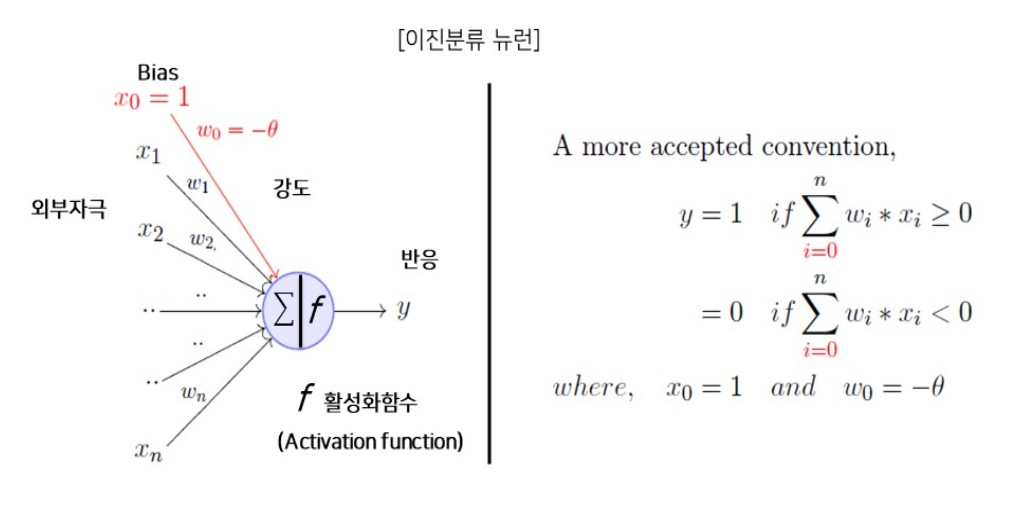

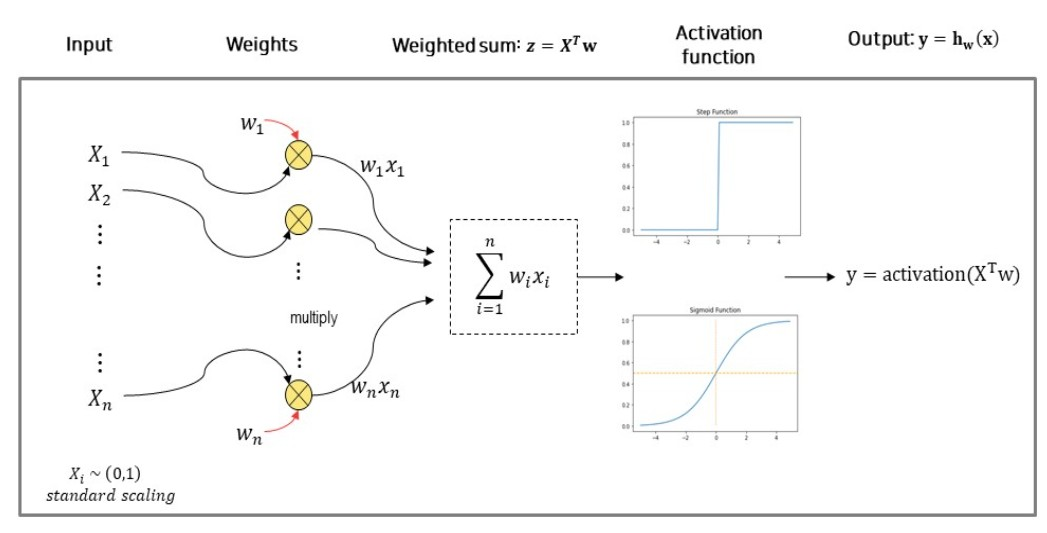

In [10]:
Image(filename= "/content/Single Nueron_mathematic_02.jpg")

### 단일뉴런이 여러층(Input, Output, Hidden layers)에 중첩되어 단계적으로 연결되는 네트웍구조

<img src='https://ars.els-cdn.com/content/image/1-s2.0-S0167779918302452-gr1b1.jpg'>

# <font color='orange'> 가. Perceptron과 활성화 함수 - 비선형 함수(Nonlinear function)

## 1. 계단 함수(Step function)


Text(0.5, 1.0, 'Step Function')

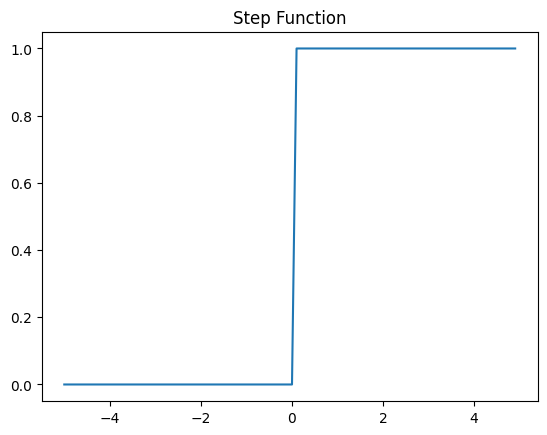

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

## 2. 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해져 그 값은 0에 가까워지는데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 되는 현상을 기울기 소실(Vanishing Gradient) 문제

Text(0.5, 1.0, 'Sigmoid Function')

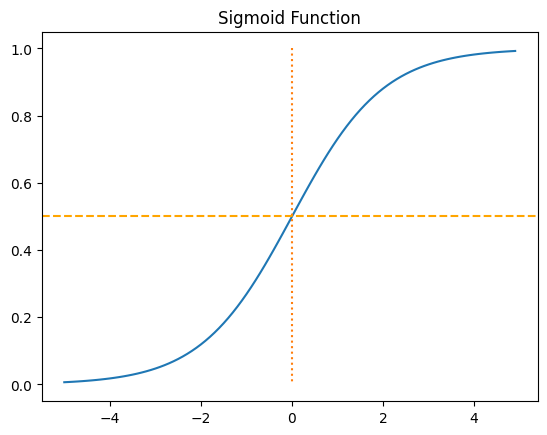

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.axhline(y=0.5, color='orange', linestyle='--')
plt.title('Sigmoid Function')
plt.show()

## 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 커서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이라 은닉층에서 시그모이드 함수보다는 많이 사용

Text(0.5, 1.0, 'Tanh Function')

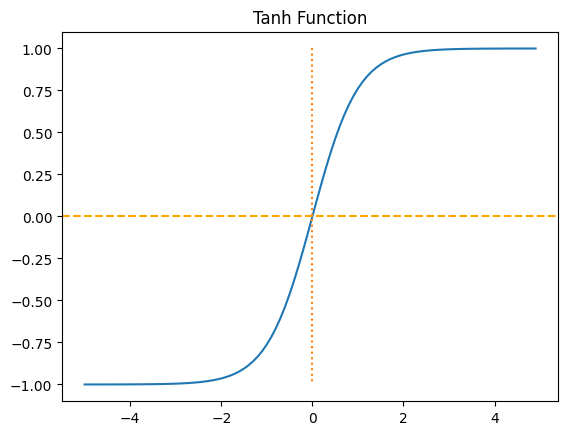

In [14]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

## 4. 렐루 함수(ReLU)

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하게 되어 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동
렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르나 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 되어 이 뉴런은 다시 회생하는 것이 매우 어렵워 이 문제를 죽은 렐루(dying ReLU)라 함

Text(0.5, 1.0, 'Relu Function')

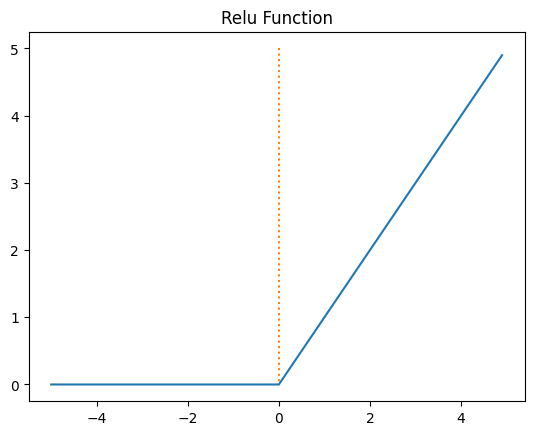

In [15]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

## 5. 리키 렐루(Leaky ReLU)
죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환

Text(0.5, 1.0, 'Leaky ReLU Function')

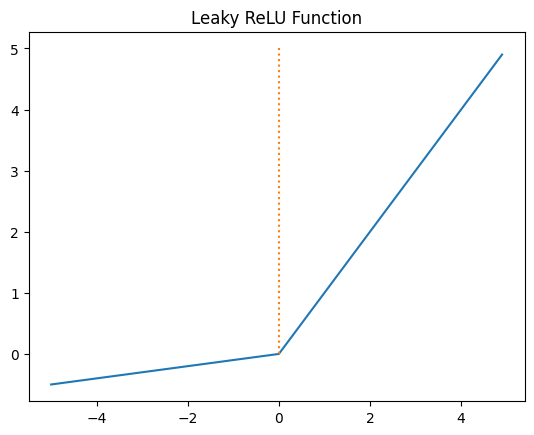

In [16]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 6. 소프트맥스 함수(Softamx function)
은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

 $\sigma(\mathbf{z})i = \frac{e^{z_i}}{\sum{j=1}^{K} e^{z_j}}$

Text(0.5, 1.0, 'Softmax Function')

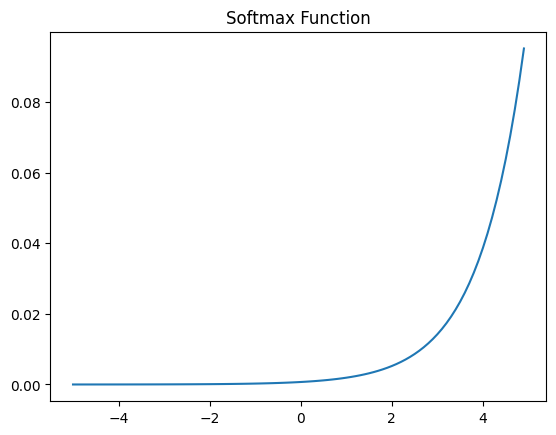

In [22]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# XOR problem solving with hidden layer, non linear transformation


In [18]:
X = np.array([[0,0], [1,1], [0,1], [1,0]])
X

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0]])

In [19]:
H = np.array([[20, -20], [20, -20]])
H

array([[ 20, -20],
       [ 20, -20]])

In [20]:
fully_connected = np.dot(X, H)
layer_output = fully_connected + np.array([-10, 30])
layer_output

array([[-10,  30],
       [ 30, -10],
       [ 10,  10],
       [ 10,  10]])

In [21]:
np.logical_not(layer_output < 0)*1

array([[0, 1],
       [1, 0],
       [1, 1],
       [1, 1]])

# 학습방법
### <font color='orange'>  deep learning 은 각 layer의 노드간 연결선(신호강도)의 세기(w)와 bias(b)를 찾는 과정 (y = wx + b, 선형회귀식을 중첩한 비선형 구조)
### 선형변환(y= wx + b)을 비선형구조로 만드는 방법은 활성화 함수(역치)

<img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F996A04425AB85ED0260F3E'>

## What is 'deep' in deep learning? data representation

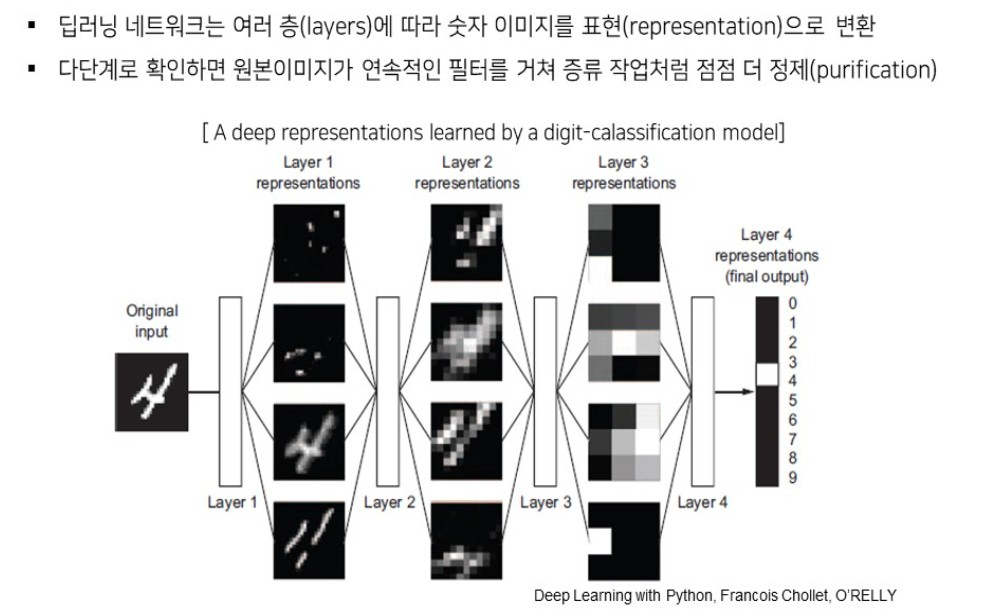

In [25]:
Image(filename= '/content/Image Representation_03.jpg')

# <font color='orange'> 다. 회귀생성모델(regression model)과 인공신경망(Artificial Neural Network)
- 고양이, 개 사진 분류

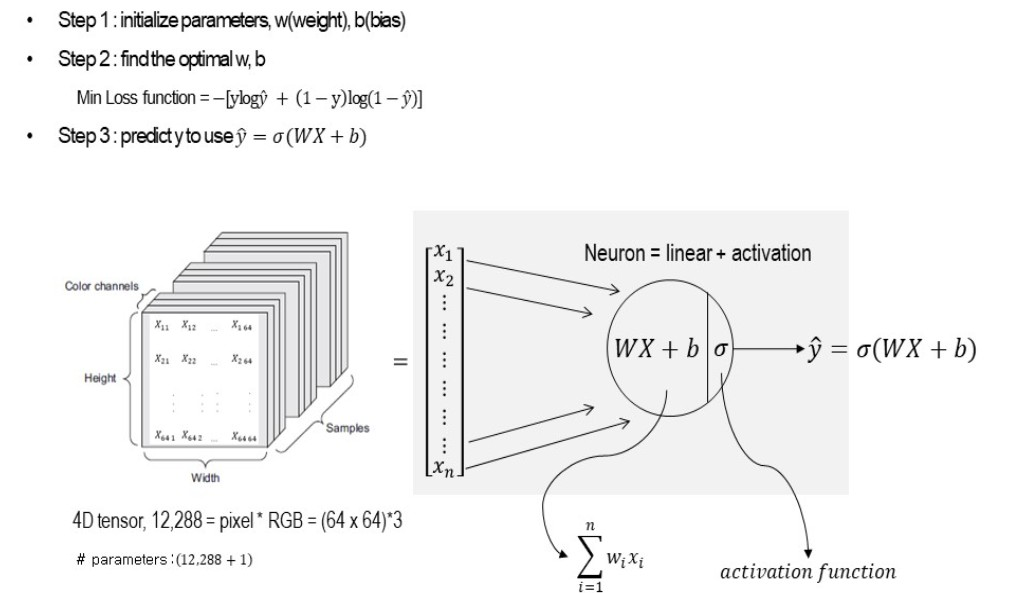

In [26]:
Image(filename= "/content/cat_dog_classification_04.jpg")

### 데이터 생성

(np.float64(0.4947167900169286), np.float64(0.28614807419409094))

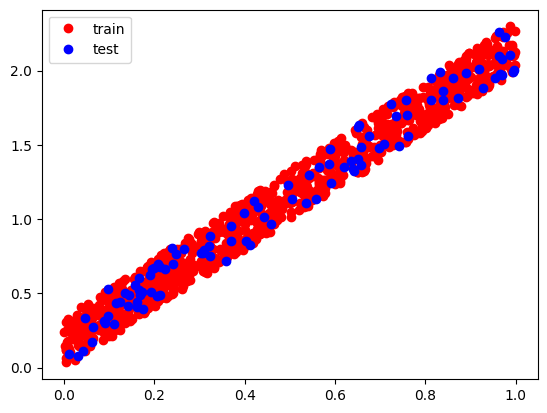

In [27]:
x_train= np.random.random((1000,1))
np.mean(x_train), np.std(x_train)
y_train = x_train*2 + np.random.random((1000,1))/3.0

x_test= np.random.random((100,1))
y_test = x_test*2 + np.random.random((100,1))/3.0

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1. Scikit-learn API의 linear regression

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 모델구성하기
model = linear_model.LinearRegression()

# 학습하고 예측
y_pred = model.fit(x_train, y_train).predict(x_test)

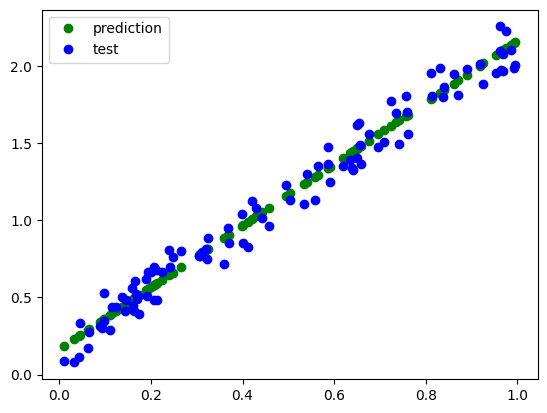

절편: [0.16686728], 기울기:[[1.99712357]], mse: 0.009045941822218826


In [30]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.legend(['prediction', 'test'], loc='upper left')
plt.show()

# 파라미터 추정과 평가
print(f'절편: {model.intercept_}, 기울기:{model.coef_}, mse: {mean_squared_error(y_test, y_pred)}')

# 2. Keras 퍼셉트론 신경망

In [31]:
from keras.models import Sequential
from keras.layers import Dense

입력변수가 1d tensor

In [32]:
# 모델구성
model = Sequential()
model.add(Dense(1, input_dim=1))

# Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(1 nodes)} = 1
- The # of bias : layer1 뉴런 수(1 nodes) = 1
- 추정할 파라미터 개수는 1+1 = 2

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=10, batch_size=64) # epoch을 증가시켜보기

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1295
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0714 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8772 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8017 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8932 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7645 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5796 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5654 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5185 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3932 


절편: [0.16774876], 기울기:[[-0.6988052]]


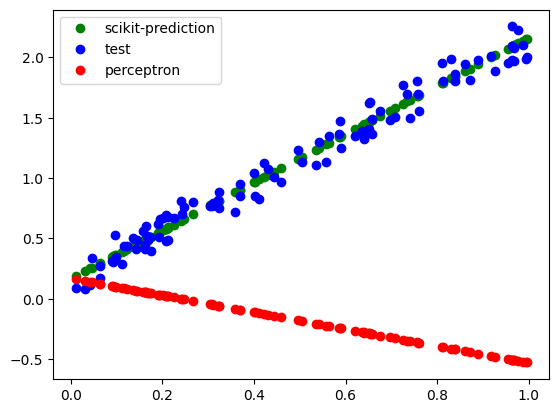

In [35]:
w, b = model.get_weights()
print(f'절편: {b}, 기울기:{w}')

plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.legend(['scikit-prediction', 'test', 'perceptron'], loc='upper left')
plt.show()

### <font color ='red'> epoch을 200으로 증가시키면 예측을 잘한다. 200 epoch을 훈련후 다시 그려보기

dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

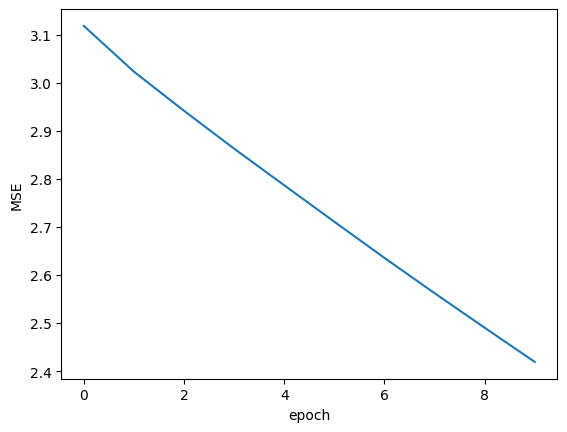

In [36]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

In [37]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.1880
mse: 2.266068696975708


# 3. FNNM(Forward Neural Network Model) with one hidden layer
## Shallow learning model
https://keras.io/api/models/

### <font color = 'orange'> Regression
### <font color = 'orange'>  회귀예측이기 때문에 최종 layer에는 1개로 activation 함수없이 구현

In [39]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))  # Try Hidden layer의 노드(뉴런) 개수 증감
model.add(Dense(1, name="layer2"))

### Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(10 nodes)} + {layer1 (노두수(10 nodes) x layer2 노드수(1 node))} = (1x10) + (10) = 20
- The # of bias : layer1 뉴런 수(10 nodes) + layer2 뉴런수(1 nodes) = 10+1 = 11
- 추정할 파라미터 개수는 20+11 = 31

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0) # epoch을 증가시켜보기

In [42]:
# 노드(뉴런) 개수만큼 weight(b, w)가 생성
model.get_weights()

[array([[ 0.6213463 , -0.4261004 , -0.47546566,  0.41376117,  0.0479057 ,
          0.16043897,  0.93660325,  0.31451583,  0.4045295 ,  0.63042265]],
       dtype=float32),
 array([ 0.03656027,  0.        ,  0.        ,  0.03888616, -0.04803754,
        -0.16025002,  0.03685787,  0.03657105,  0.03837942,  0.0368654 ],
       dtype=float32),
 array([[ 0.7808314 ],
        [ 0.222606  ],
        [ 0.36918277],
        [ 0.34099084],
        [-0.3801049 ],
        [-0.07341546],
        [ 0.5946098 ],
        [ 0.8987275 ],
        [ 0.37378484],
        [ 0.6094497 ]], dtype=float32),
 array([0.03590337], dtype=float32)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


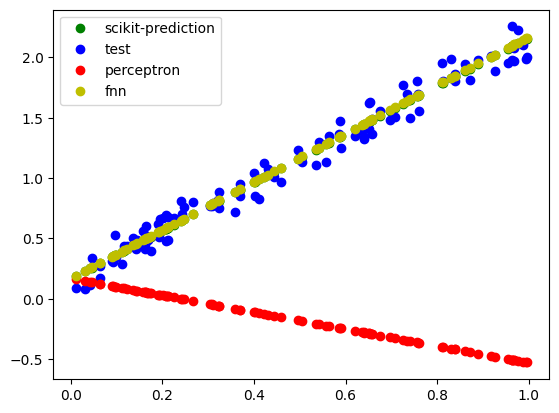

In [43]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.plot(x_test, model.predict(x_test), 'yo')
plt.legend(['scikit-prediction', 'test', 'perceptron', 'fnn'], loc='upper left')
plt.show()

In [44]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0092
mse: 0.009132832288742065


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

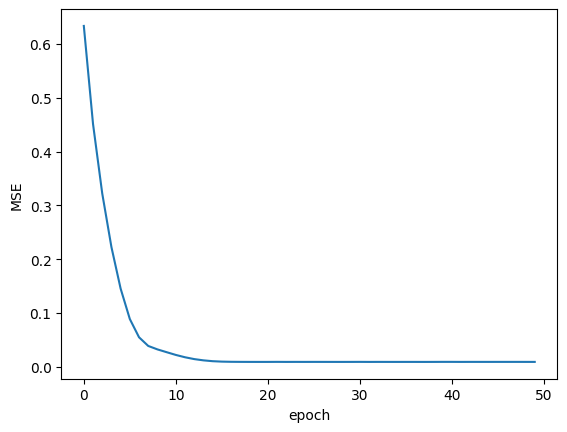

In [45]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

# 4. FNNM(Forward Neural Network Model) with two hidden layer
## Deep learning model
Hidden layer를 추가할 수록 예측 성능은 높아지게 됨

In [46]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))
model.add(Dense(10, activation='relu', name="layer2"))
model.add(Dense(1, name="layer3"))

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0)

In [49]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0092
mse: 0.009082508273422718


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

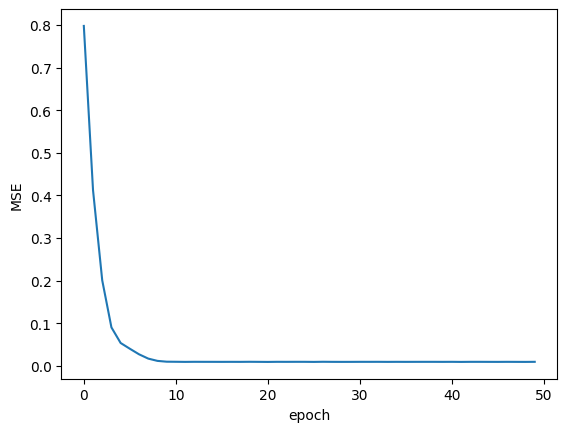

In [50]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

<img src='https://i.imgur.com/rFI1tIk.gif'>

# <font color='orange'> 라. Binary Classification : 실습 diabetes dataset

### 1.Loading the diabets dataset in Keras

In [51]:
from sklearn.datasets import load_wine
import pandas as pd

load_wine().keys()
df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df['target'] = load_wine().target
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 2. 데이터셋 생성하기

In [52]:
df['target'].value_counts()
df = df[df['target'] !=2]
df.shape

,count
target,
1,71
0,59
2,48


(130, 14)

In [53]:
x_train = df.iloc[:100,0:13]
y_train = df.iloc[:100,13]
x_test = df.iloc[100:,0:13]
y_test = df.iloc[100:,13]

### 3. 모델 구성하기
### <font color = 'orange'> Multicalss Classification
### <font color = 'orange'> 입력변수 8개를 받아 2개 hidden을 만들고 마지막 레이어는 sigmoid 활성화함수로 모델 구현

In [54]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 학습과정 설정하기

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [56]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 685ms/step - accuracy: 0.5756 - loss: 54.3465
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5756 - loss: 50.1541
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5860 - loss: 45.1337
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5860 - loss: 44.2749
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5756 - loss: 41.9128
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5808 - loss: 38.6031
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5913 - loss: 33.8786
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5652 - loss: 32.8942
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6017 - loss: 27.0929
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5756 - loss: 26.6689


# <font color='orange'> 마. Multiclass Classification : 실습 The MNIST dataset in Keras

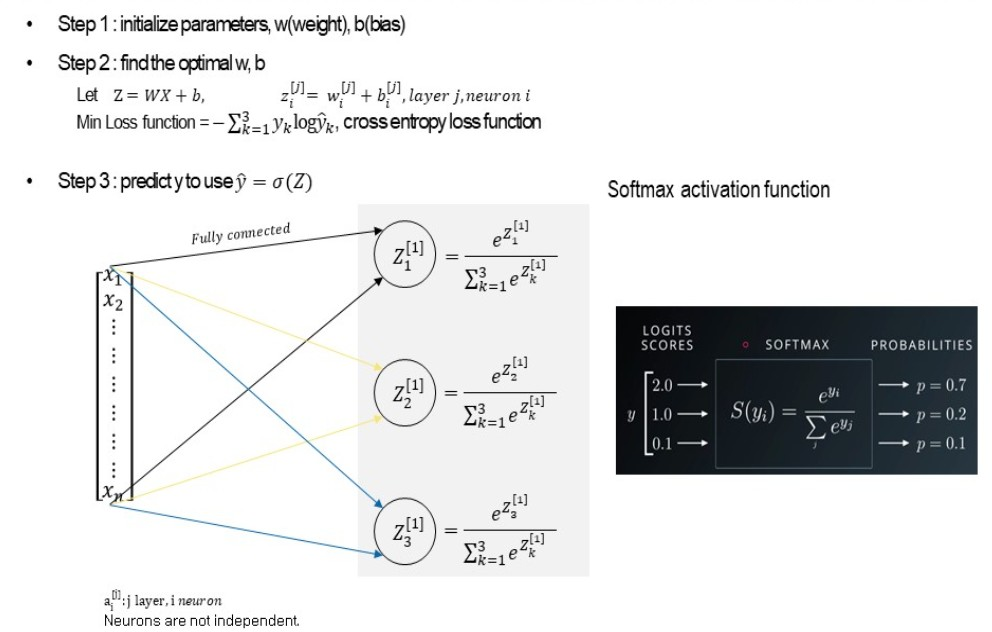

In [57]:
Image(filename= '/content/multi_classification_05.jpg')

### 1.Loading the MNIST dataset in Keras

In [58]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [59]:
train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
test_labels

(60000, 28, 28)

60000

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 2. The network architecture

### <font color = 'orange'> Multicalss Classification
### <font color = 'orange'> 10개를 구분하여야 하기 때문에 최종 layer에는 10개로 Softmax로 모델 구현

In [60]:
x_train.shape

(100, 13)

In [61]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### 3. The compilation step
### <font color = 'orange'> 다중분류이기 떄문에 'categorical_crossentropy'


In [62]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', metrics=['accuracy'])

### 4. Preparing the image data (자료표준화)

In [63]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 5. model fitting

In [64]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8698 - loss: 0.4459
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1169
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0742
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0533
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0373


In [65]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0777


In [66]:
print('test_acc:', test_acc)

test_acc: 0.9803000092506409


# End